# "Trends on Trends" - An Analysis of Youtube Trending Videos


This project will explore how the Youtube creator and other viewers affect the path from viewer to view, within the Youtube platform (excluding outside factors).

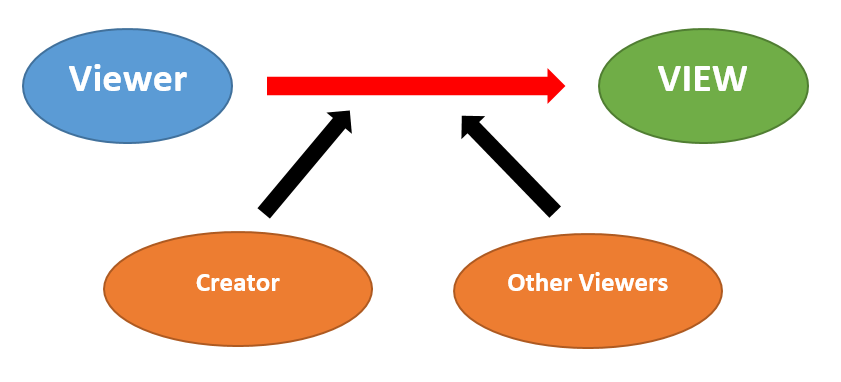

In [16]:
from IPython.display import Image
Image(filename='Youtube Relationship - Diagram.PNG') 


## QUESTIONS TO EXPLORE

### * Are there any patterns that can predict video trendability? 
### * Whose actions correlate with trendability (creator, viewer, platform)?
### * Based on data, any areas Youtube should focus on supporting?


## DATA BACKGROUND & PREVIEW

### What data is available?
* "Daily Record of the Top Trending Youtube Videos"
* Up to 200 trending videos per day
* Two dataframes with the same columns (19). 'df' contains one line per video with final numbers while "df_all_timestamps" contains snapshots throughtout the day. 

### Limitations
* No data on the viewers or path to arrive to video. 

### Questions
* What defines trending? 

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
filename1 = 'dataframe.csv'
filename2 = 'dataframe_all_timestamps.csv'

datapath1 = os.path.join('..',filename1)
datapath2 = os.path.join('..',filename2)

In [7]:
df = pd.read_csv(datapath1)
df_all_timestamps = pd.read_csv(datapath2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [6]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [7]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR


In [8]:
df_all_timestamps.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR


## YOUTUBE CREATOR

The Youtube Creator has a lot of control over the properties of the channel and video. The following properties are either manually entered by the creator OR are generated from a result of an action by the creator: Title, Description, Thumbnail, Tags, Category, Video Location (country), Comments Disabled, Ratings Disabled, Publish Date, and Publish Time.

This section will explore if the properties that the creator has control of have any correlation with trendability.

### Findings / Of Notice
* FASDF

### Business Insight
* FASDFS

### Further Study Needed
* FASDF

In [33]:
country_count = df['country'].value_counts()
print(country_count)

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

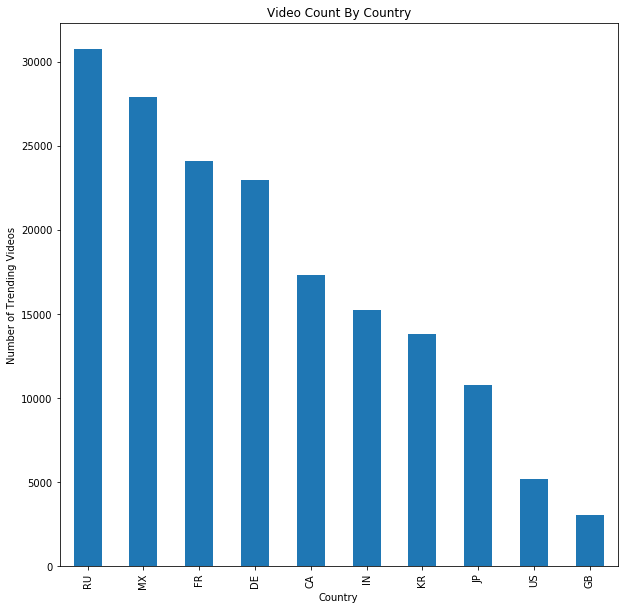

In [37]:
# Bar plot of country

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
country_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of Trending Videos')# Set text for y axis


# FINDINGS
# Russia, Mexico, and France are the top 3 origins of most trending videos

In [35]:
category_count = df['category'].value_counts()
print(counts_all)

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64


Text(0, 0.5, 'Number of Trending Videos')

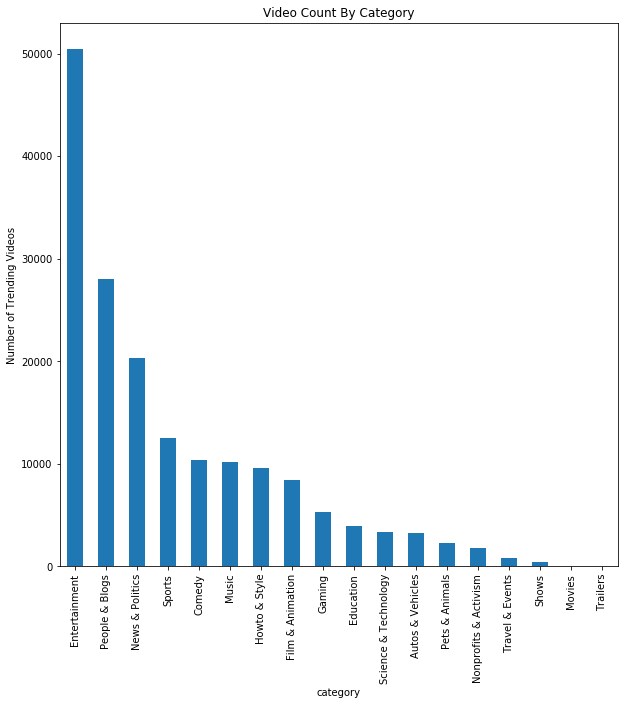

In [36]:
# Bar plot per category

fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
category_count.plot(kind = 'bar', ax = ax)
ax.set_title('Video Count By Category') # Give the plot a main title
ax.set_xlabel('category') # Set text for the x axis
ax.set_ylabel('Number of Trending Videos')# Set text for y axis

# Findings 


In [2]:
#test - note